In [33]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [34]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df["target"] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [35]:
x = np.array(df[iris["feature_names"]])
y = np.array(df["target"])

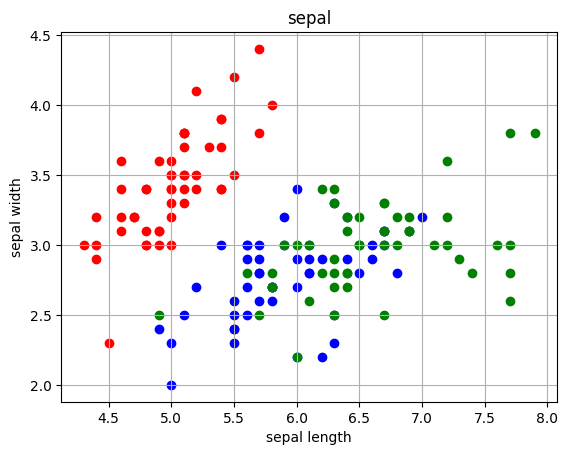

In [36]:
iris_df1 = pd.DataFrame(iris.data[:50])
iris_df2 = pd.DataFrame(iris.data[50:100])
iris_df3 = pd.DataFrame(iris.data[100:150])

plt.scatter(iris_df1[0], iris_df1[1], c="red")
plt.scatter(iris_df2[0], iris_df2[1], c="blue")
plt.scatter(iris_df3[0], iris_df3[1], c="green")

plt.title('sepal')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True)
plt.show()

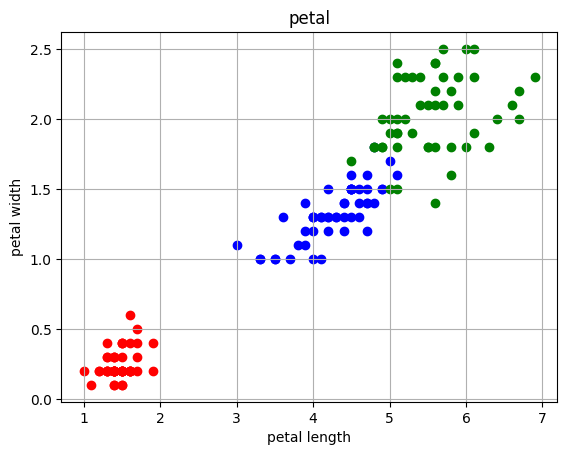

In [37]:
plt.scatter(iris_df1[2], iris_df1[3], c="red")
plt.scatter(iris_df2[2], iris_df2[3], c="blue")
plt.scatter(iris_df3[2], iris_df3[3], c="green")

plt.title('petal')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.grid(True)
plt.show()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = SVC(kernel='linear', random_state=0)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('y_test: ',y_test[:10])
print('y_pred: ',y_pred[:10])


y_test:  [2 1 0 2 0 2 0 1 1 1]
y_pred:  [2 1 0 2 0 2 0 1 1 1]


In [39]:
y_train_pred = model.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred)
print('train score: ',train_acc)
 
y_test_pred = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
print('test score: ',test_acc)

train score:  0.975
test score:  1.0


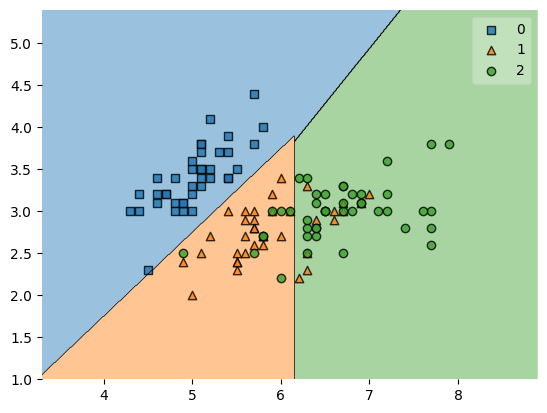

In [40]:
x_decision = x_train[:, [0,1]]
y_decision = y_train

model.fit(x_decision, y_decision)

plot_decision_regions(x_decision, y_decision, clf=model)
plt.show()

## 2. k-NN (k-Nearest Neighbors) による分類

In [41]:
# k-NNモデルの構築と学習
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# 予測
y_pred_knn = knn_model.predict(x_test)
print('y_test: ', y_test[:10])
print('y_pred (k-NN): ', y_pred_knn[:10])

y_test:  [2 1 0 2 0 2 0 1 1 1]
y_pred (k-NN):  [2 1 0 2 0 2 0 1 1 1]


In [42]:
# k-NNの精度評価
y_train_pred_knn = knn_model.predict(x_train)
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
print('train score (k-NN): ', train_acc_knn)

y_test_pred_knn = knn_model.predict(x_test)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)
print('test score (k-NN): ', test_acc_knn)

train score (k-NN):  0.95
test score (k-NN):  0.9666666666666667


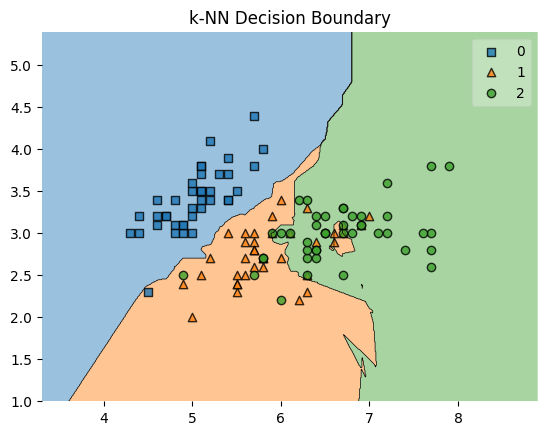

In [43]:
# k-NNの決定境界の可視化
x_decision_knn = x_train[:, [0, 1]]
y_decision_knn = y_train

knn_model.fit(x_decision_knn, y_decision_knn)

plot_decision_regions(x_decision_knn, y_decision_knn, clf=knn_model)
plt.title('k-NN Decision Boundary')
plt.show()

## 3. Perceptron による分類

In [44]:
# Perceptronモデルの構築と学習
perceptron_model = Perceptron(max_iter=1000, random_state=0)
perceptron_model.fit(x_train, y_train)

# 予測
y_pred_perceptron = perceptron_model.predict(x_test)
print('y_test: ', y_test[:10])
print('y_pred (Perceptron): ', y_pred_perceptron[:10])

y_test:  [2 1 0 2 0 2 0 1 1 1]
y_pred (Perceptron):  [2 1 0 2 0 2 0 1 1 1]


In [45]:
# Perceptronの精度評価
y_train_pred_perceptron = perceptron_model.predict(x_train)
train_acc_perceptron = accuracy_score(y_train, y_train_pred_perceptron)
print('train score (Perceptron): ', train_acc_perceptron)

y_test_pred_perceptron = perceptron_model.predict(x_test)
test_acc_perceptron = accuracy_score(y_test, y_test_pred_perceptron)
print('test score (Perceptron): ', test_acc_perceptron)

train score (Perceptron):  0.95
test score (Perceptron):  1.0


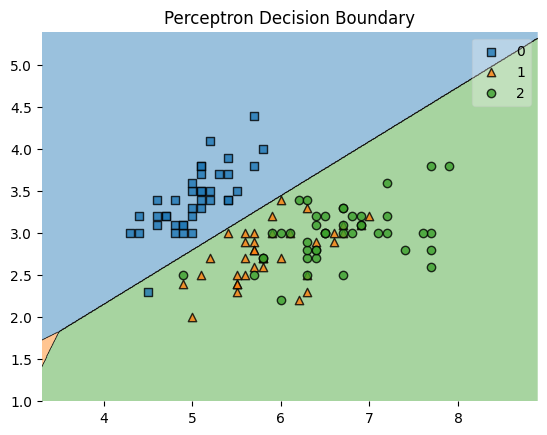

In [46]:
# Perceptronの決定境界の可視化
x_decision_perceptron = x_train[:, [0, 1]]
y_decision_perceptron = y_train

perceptron_model.fit(x_decision_perceptron, y_decision_perceptron)

plot_decision_regions(x_decision_perceptron, y_decision_perceptron, clf=perceptron_model)
plt.title('Perceptron Decision Boundary')
plt.show()

## 4. 3つの手法の比較

       Method  Train Accuracy  Test Accuracy
0         SVM           0.975       1.000000
1        k-NN           0.950       0.966667
2  Perceptron           0.950       1.000000


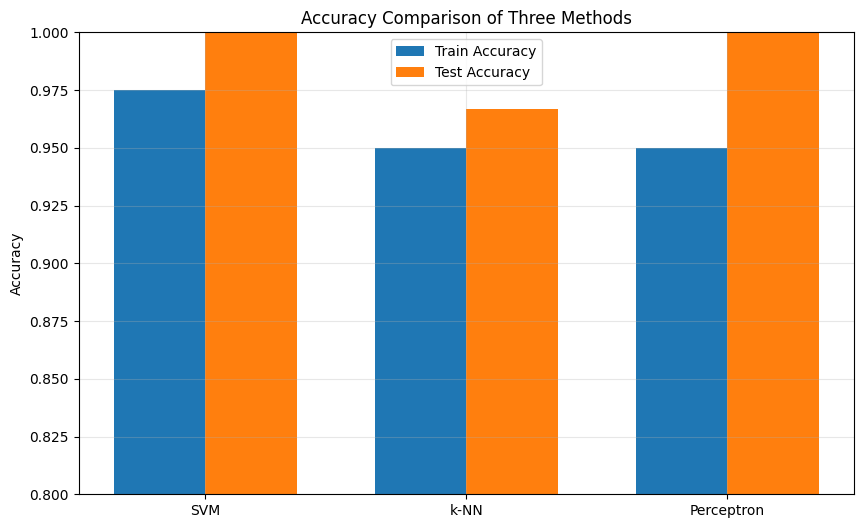

In [47]:
# 3つの手法の精度を比較
results = pd.DataFrame({
    'Method': ['SVM', 'k-NN', 'Perceptron'],
    'Train Accuracy': [train_acc, train_acc_knn, train_acc_perceptron],
    'Test Accuracy': [test_acc, test_acc_knn, test_acc_perceptron]
})

print(results)

# 棒グラフで可視化
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(results['Method']))
width = 0.35

ax.bar(x_pos - width/2, results['Train Accuracy'], width, label='Train Accuracy')
ax.bar(x_pos + width/2, results['Test Accuracy'], width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of Three Methods')
ax.set_xticks(x_pos)
ax.set_xticklabels(results['Method'])
ax.legend()
ax.set_ylim([0.8, 1.0])

plt.grid(True, alpha=0.3)
plt.show()

## 5. 特徴量を変更した実験(2特徴量のみ使用)

In [48]:
# 特徴量を2つに削減(petal length, petal width)
x_2features = x[:, [2, 3]]  # petal length, petal width のみ使用

x_train_2f, x_test_2f, y_train_2f, y_test_2f = train_test_split(
    x_2features, y, test_size=0.2, random_state=0
)

# 各手法で学習と評価
print("=" * 50)
print("特徴量を2つに削減した場合の結果")
print("=" * 50)

# SVM
svm_2f = SVC(kernel='linear', random_state=0)
svm_2f.fit(x_train_2f, y_train_2f)
svm_2f_acc = accuracy_score(y_test_2f, svm_2f.predict(x_test_2f))
print(f'SVM (2特徴量) テスト精度: {svm_2f_acc:.4f}')

# k-NN
knn_2f = KNeighborsClassifier(n_neighbors=5)
knn_2f.fit(x_train_2f, y_train_2f)
knn_2f_acc = accuracy_score(y_test_2f, knn_2f.predict(x_test_2f))
print(f'k-NN (2特徴量) テスト精度: {knn_2f_acc:.4f}')

# Perceptron
perceptron_2f = Perceptron(max_iter=1000, random_state=0)
perceptron_2f.fit(x_train_2f, y_train_2f)
perceptron_2f_acc = accuracy_score(y_test_2f, perceptron_2f.predict(x_test_2f))
print(f'Perceptron (2特徴量) テスト精度: {perceptron_2f_acc:.4f}')

特徴量を2つに削減した場合の結果
SVM (2特徴量) テスト精度: 1.0000
k-NN (2特徴量) テスト精度: 1.0000
Perceptron (2特徴量) テスト精度: 0.4667


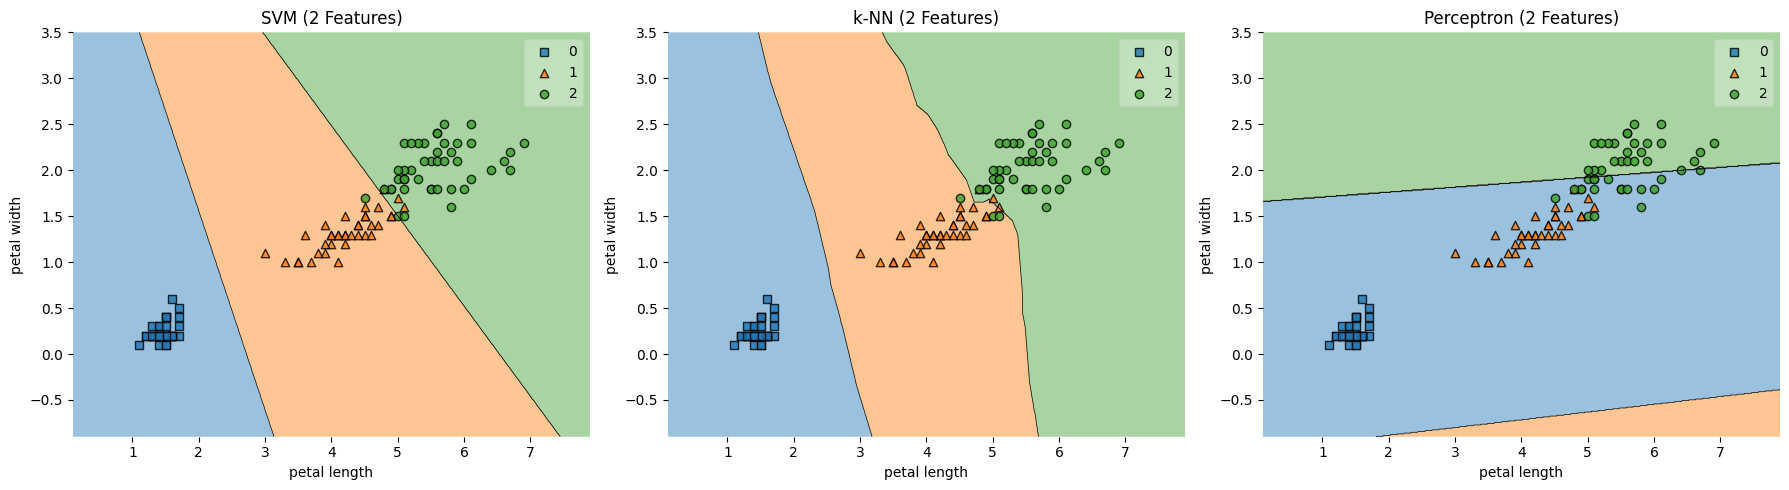

In [49]:
# 2特徴量の場合の決定境界を可視化
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SVM
plot_decision_regions(x_train_2f, y_train_2f, clf=svm_2f, ax=axes[0])
axes[0].set_title('SVM (2 Features)')
axes[0].set_xlabel('petal length')
axes[0].set_ylabel('petal width')

# k-NN
plot_decision_regions(x_train_2f, y_train_2f, clf=knn_2f, ax=axes[1])
axes[1].set_title('k-NN (2 Features)')
axes[1].set_xlabel('petal length')
axes[1].set_ylabel('petal width')

# Perceptron
plot_decision_regions(x_train_2f, y_train_2f, clf=perceptron_2f, ax=axes[2])
axes[2].set_title('Perceptron (2 Features)')
axes[2].set_xlabel('petal length')
axes[2].set_ylabel('petal width')

plt.tight_layout()
plt.show()

## 6. クラス数を変更した実験(2クラスのみ使用)

In [50]:
# クラス0と1のみを使用(2クラス分類)
binary_mask = y <= 1
x_binary = x[binary_mask]
y_binary = y[binary_mask]

x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(
    x_binary, y_binary, test_size=0.2, random_state=0
)

print("=" * 50)
print("2クラス分類の結果")
print("=" * 50)

# SVM
svm_bin = SVC(kernel='linear', random_state=0)
svm_bin.fit(x_train_bin, y_train_bin)
svm_bin_acc = accuracy_score(y_test_bin, svm_bin.predict(x_test_bin))
print(f'SVM (2クラス) テスト精度: {svm_bin_acc:.4f}')

# k-NN
knn_bin = KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(x_train_bin, y_train_bin)
knn_bin_acc = accuracy_score(y_test_bin, knn_bin.predict(x_test_bin))
print(f'k-NN (2クラス) テスト精度: {knn_bin_acc:.4f}')

# Perceptron
perceptron_bin = Perceptron(max_iter=1000, random_state=0)
perceptron_bin.fit(x_train_bin, y_train_bin)
perceptron_bin_acc = accuracy_score(y_test_bin, perceptron_bin.predict(x_test_bin))
print(f'Perceptron (2クラス) テスト精度: {perceptron_bin_acc:.4f}')

2クラス分類の結果
SVM (2クラス) テスト精度: 1.0000
k-NN (2クラス) テスト精度: 1.0000
Perceptron (2クラス) テスト精度: 1.0000


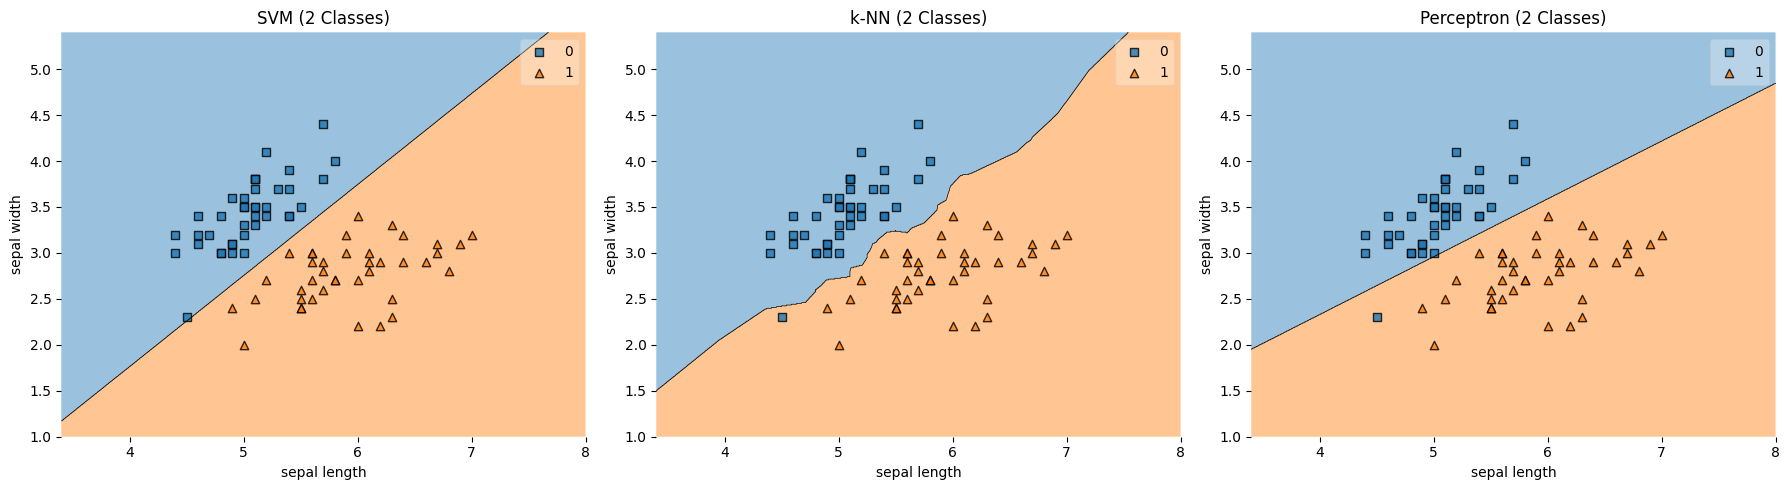

In [51]:
# 2クラス分類の場合の決定境界を可視化
x_train_bin_2d = x_train_bin[:, [0, 1]]  # sepal length, sepal widthを使用
y_train_bin_2d = y_train_bin

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SVM
svm_bin.fit(x_train_bin_2d, y_train_bin_2d)
plot_decision_regions(x_train_bin_2d, y_train_bin_2d, clf=svm_bin, ax=axes[0])
axes[0].set_title('SVM (2 Classes)')
axes[0].set_xlabel('sepal length')
axes[0].set_ylabel('sepal width')

# k-NN
knn_bin.fit(x_train_bin_2d, y_train_bin_2d)
plot_decision_regions(x_train_bin_2d, y_train_bin_2d, clf=knn_bin, ax=axes[1])
axes[1].set_title('k-NN (2 Classes)')
axes[1].set_xlabel('sepal length')
axes[1].set_ylabel('sepal width')

# Perceptron
perceptron_bin.fit(x_train_bin_2d, y_train_bin_2d)
plot_decision_regions(x_train_bin_2d, y_train_bin_2d, clf=perceptron_bin, ax=axes[2])
axes[2].set_title('Perceptron (2 Classes)')
axes[2].set_xlabel('sepal length')
axes[2].set_ylabel('sepal width')

plt.tight_layout()
plt.show()

## 7. 総合比較と考察

In [52]:
# すべての実験結果をまとめて比較
comparison_df = pd.DataFrame({
    '実験条件': ['全特徴量(4特徴量)・3クラス', 
                '全特徴量(4特徴量)・3クラス',
                '全特徴量(4特徴量)・3クラス',
                '2特徴量・3クラス',
                '2特徴量・3クラス', 
                '2特徴量・3クラス',
                '全特徴量(4特徴量)・2クラス',
                '全特徴量(4特徴量)・2クラス',
                '全特徴量(4特徴量)・2クラス'],
    '手法': ['SVM', 'k-NN', 'Perceptron',
            'SVM', 'k-NN', 'Perceptron',
            'SVM', 'k-NN', 'Perceptron'],
    'テスト精度': [test_acc, test_acc_knn, test_acc_perceptron,
                svm_2f_acc, knn_2f_acc, perceptron_2f_acc,
                svm_bin_acc, knn_bin_acc, perceptron_bin_acc]
})

print("=" * 80)
print("すべての実験結果の比較")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("=" * 80)

すべての実験結果の比較
           実験条件         手法    テスト精度
全特徴量(4特徴量)・3クラス        SVM 1.000000
全特徴量(4特徴量)・3クラス       k-NN 0.966667
全特徴量(4特徴量)・3クラス Perceptron 1.000000
      2特徴量・3クラス        SVM 1.000000
      2特徴量・3クラス       k-NN 1.000000
      2特徴量・3クラス Perceptron 0.466667
全特徴量(4特徴量)・2クラス        SVM 1.000000
全特徴量(4特徴量)・2クラス       k-NN 1.000000
全特徴量(4特徴量)・2クラス Perceptron 1.000000


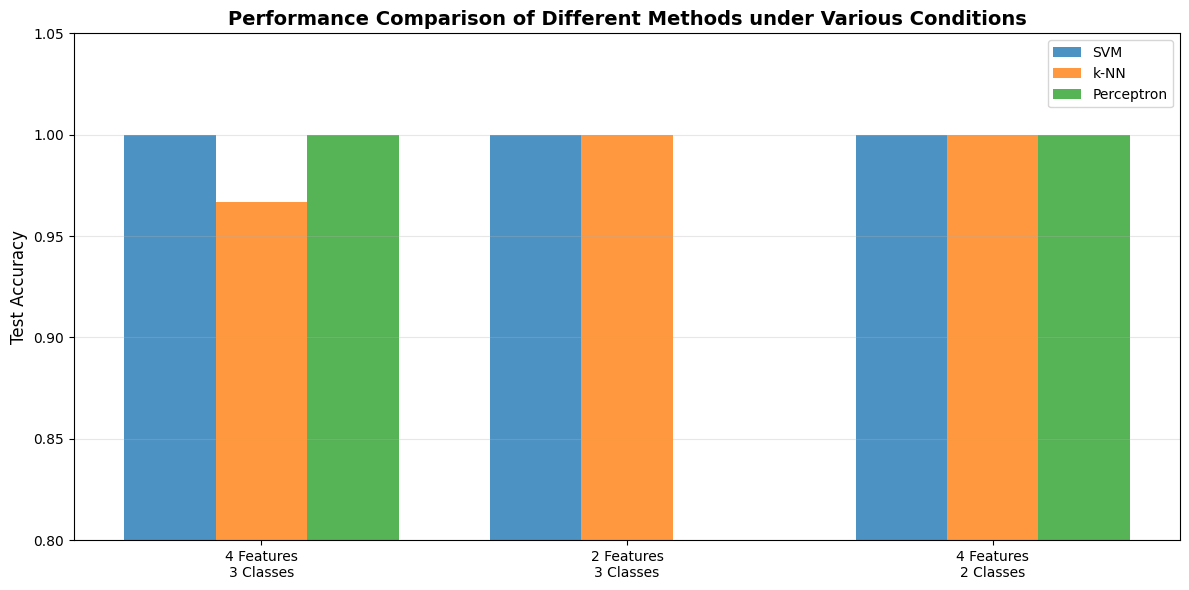

In [53]:
# 結果を可視化
fig, ax = plt.subplots(figsize=(12, 6))

conditions = comparison_df['実験条件'].unique()
methods = ['SVM', 'k-NN', 'Perceptron']
x_pos = np.arange(len(conditions))
width = 0.25

for i, method in enumerate(methods):
    method_data = comparison_df[comparison_df['手法'] == method]
    ax.bar(x_pos + i * width, method_data['テスト精度'], 
           width, label=method, alpha=0.8)

ax.set_ylabel('Test Accuracy', fontsize=12)
ax.set_title('Performance Comparison of Different Methods under Various Conditions', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos + width)
ax.set_xticklabels(['4 Features\n3 Classes', '2 Features\n3 Classes', '4 Features\n2 Classes'], fontsize=10)
ax.legend(fontsize=10)
ax.set_ylim([0.8, 1.05])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 考察

1. **手法による違い**
   - **SVM**: マージンを最大化する決定境界を構築するため、安定した性能を示す
   - **k-NN**: 最も近い5つのサンプルから予測を行う。局所的なパターンをよく捉える
   - **Perceptron**: 線形分離可能な問題に有効だが、収束が不安定になることがある

2. **特徴量数の影響**
   - 4特徴量から2特徴量に削減すると、情報量が減るため精度が低下する傾向がある
   - ただし、Irisデータセットではpetal length/widthが特に識別力が高いため、2特徴量でも比較的高い精度を維持できる

3. **クラス数の影響**
   - 2クラス分類は3クラス分類に比べて問題が単純になるため、一般的に高い精度を達成しやすい
   - 特にPerceptronは線形分離可能な2クラス問題で高い性能を発揮する

4. **決定境界の形状**
   - SVMとPerceptronは線形決定境界を形成
   - k-NNは非線形な決定境界を形成でき、より複雑なパターンを学習可能